In [107]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
#import seaborn as sns
#sns.set(style="white")

In [119]:
def make_plot(X, y, degree=1, penalty='none', penalty_value=0):
    poly = PolynomialFeatures(degree=degree)
    X_train = poly.fit_transform(X)

    clf = LogisticRegression(penalty=penalty, C=penalty_value).fit(X_train, y)

    xx, yy = np.mgrid[-5:5:.1, -5:5:.1]
    grid = np.c_[xx.ravel(), yy.ravel()]
    probs = clf.predict_proba(poly.transform(np.c_[xx.ravel(), yy.ravel()]))[:, 1].reshape(xx.shape)

    f, ax = plt.subplots(figsize=(8, 6))
    contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                           vmin=0, vmax=1)

    ax_c = f.colorbar(contour)
    ax_c.set_label("$P(y = 1)$")
    ax_c.set_ticks([0, .25, .5, .75, 1])

    ax.scatter(X[100:,0], X[100:, 1], c=y[100:], s=50,
               cmap="RdBu", vmin=-.2, vmax=1.2,
               edgecolor="white", linewidth=1)

    ax.set(aspect="equal",
           xlim=(-5, 5), ylim=(-5, 5),
           xlabel="$X_1$", ylabel="$X_2$")
    plt.title(f'{degree} Poly. Degree Dataset')
    plt.savefig(f'reg_plot{degree}.png')

In [109]:
X, y = make_classification(200, 2, 2, 0, weights=[.5, .5], random_state=15)

In [110]:
np.linspace(1, 10, num=4)

array([ 1.,  4.,  7., 10.])

/usr/local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:937: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:937: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

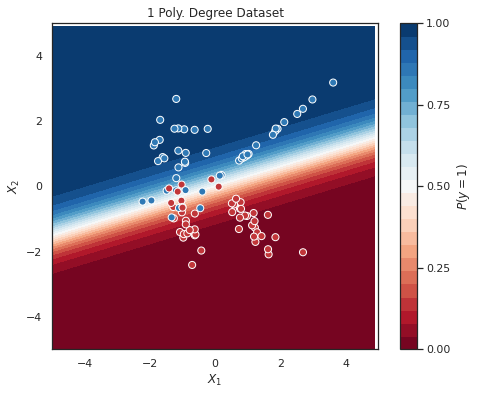

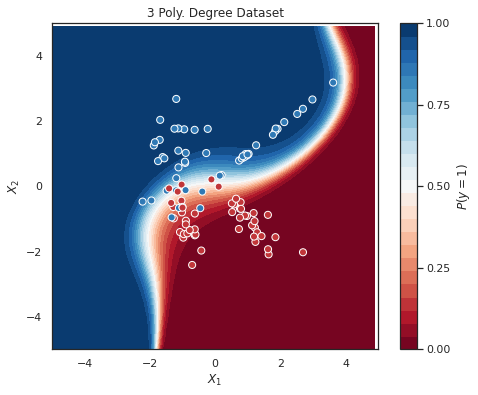

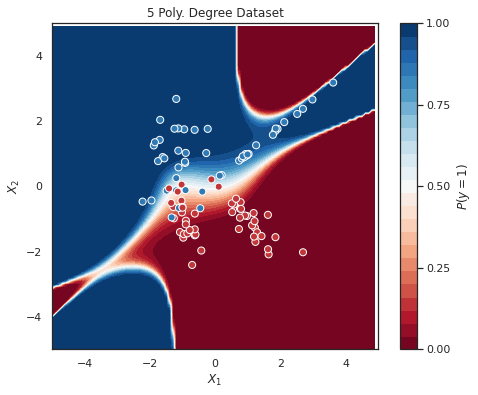

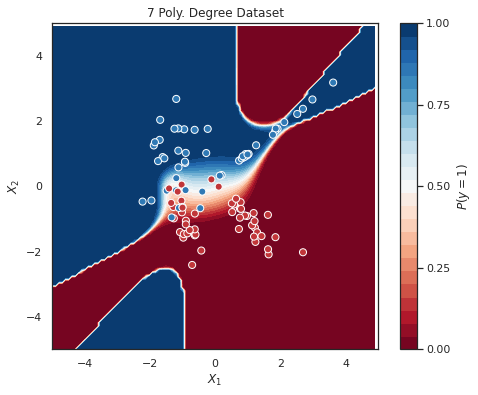

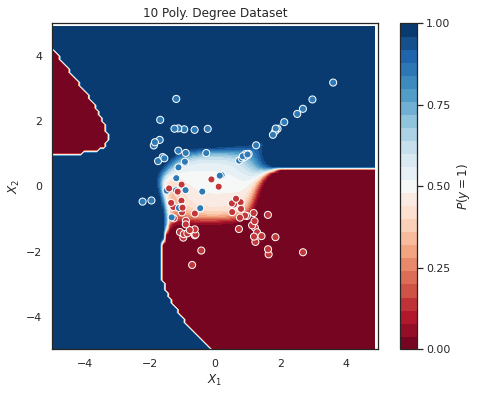

In [111]:
for degree in [1, 3, 5, 7, 10]:
    make_plot(X, y, degree=int(degree))

/usr/local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:937: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:937: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

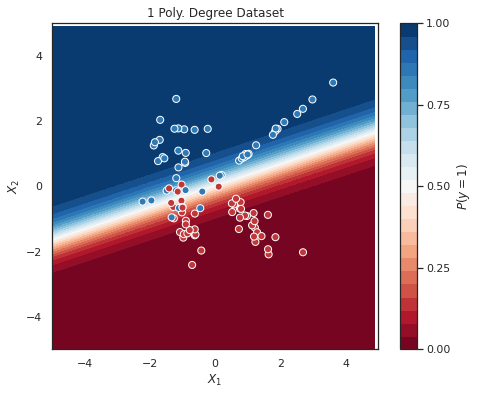

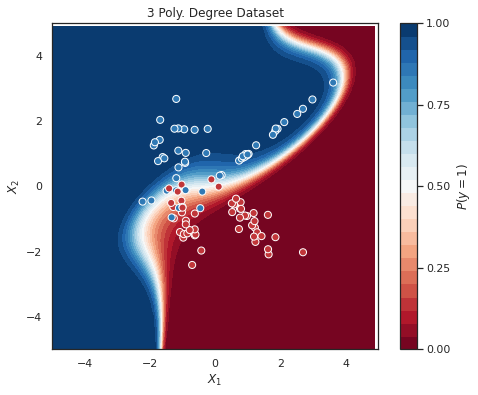

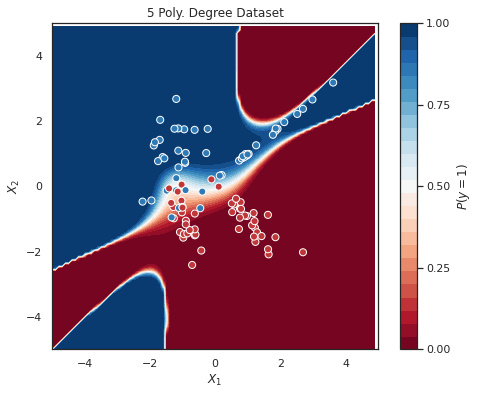

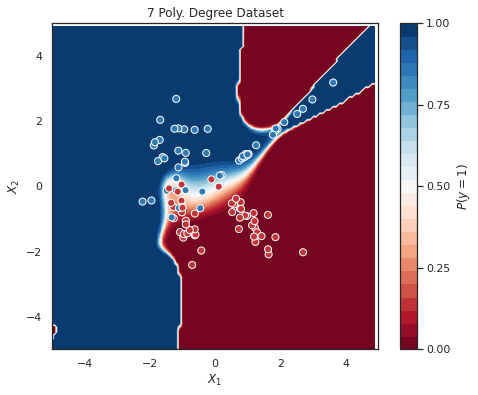

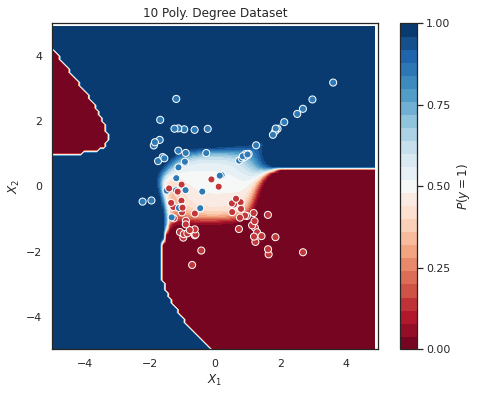

In [120]:
for [degree, c] in [[1, 10], [3, 7], [5, 5], [7, 3], [10,1]]:
    make_plot(X, y, degree=degree, penalty='l2', penalty_value=c)